<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file



Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"manojkumarmallela","key":"d79a2933bafd007670e0f720a7395428"}'}

In [54]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [55]:
!kaggle datasets download -d swatikhedekar/exploratory-data-analysis-on-netflix-data



Dataset URL: https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data
License(s): CC0-1.0
exploratory-data-analysis-on-netflix-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
!unzip /content/exploratory-data-analysis-on-netflix-data.zip

Archive:  /content/exploratory-data-analysis-on-netflix-data.zip
replace netflix img.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: netflix img.png         
replace netflix_titles_2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [57]:
df = pd.read_csv('netflix_titles_2021.csv')  # Replace with actual CSV filename

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [60]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
df.isnull().sum()   #finding the missing values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [62]:
df.dropna(subset=['date_added','rating','duration'], inplace=True)

In [63]:
df.fillna({
    'director':'Unknown',
    'cast':'Unknown',
    'country':'Unknown'},
    inplace=True)

In [64]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [40]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8790,4527,7679,749,1765,14,220,513,8758
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2621,825,2809,109,3205,1791,362,4


In [41]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


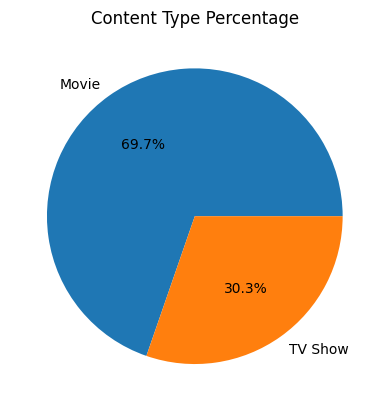

In [65]:
con_dis = df['type'].value_counts()

plt.pie(con_dis, labels=con_dis.index, autopct='%1.1f%%')
plt.title('Content Type Percentage')
plt.show()

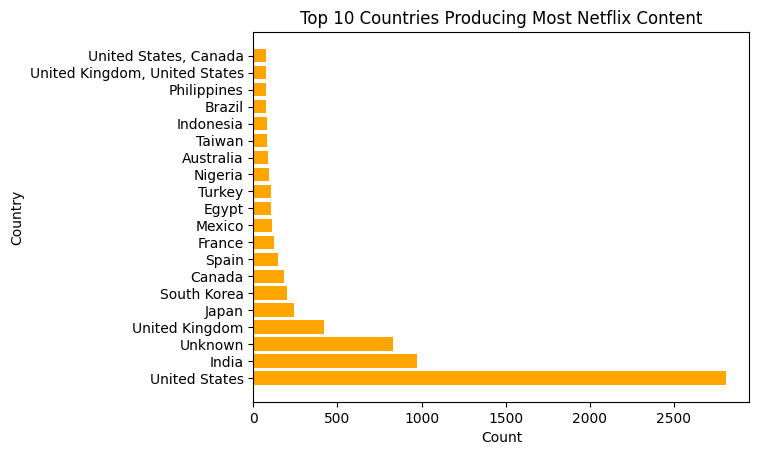

In [67]:
#Top 10 countries producing most netflix content

top_10_countries = df['country'].value_counts().head(20)

plt.barh(top_10_countries.index, top_10_countries.values, color=['orange'])
plt.xlabel('Count')
plt.ylabel('Country')
plt.title("Top 10 Countries Producing Most Netflix Content")
plt.show()

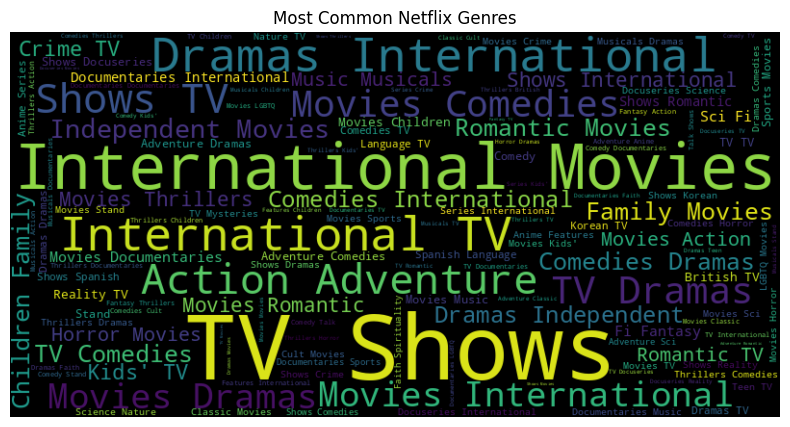

In [47]:
# Most Common Movie & TV Show Genres

from wordcloud import WordCloud
text = " ".join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Netflix Genres")
plt.show()

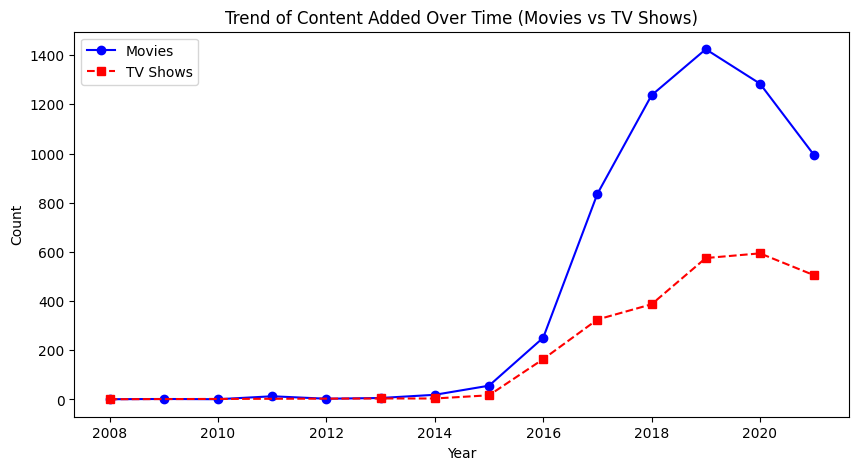

In [80]:
# Trend of Content Added Over Time

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Separate trends by content type
movies_trend = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tvshows_trend = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(10, 5))
plt.plot(movies_trend.index, movies_trend.values, marker='o', linestyle='-', color='blue', label='Movies')
plt.plot(tvshows_trend.index, tvshows_trend.values, marker='s', linestyle='--', color='red', label='TV Shows')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend of Content Added Over Time (Movies vs TV Shows)')
plt.legend()  # Show legend

# Show the plot
plt.show()

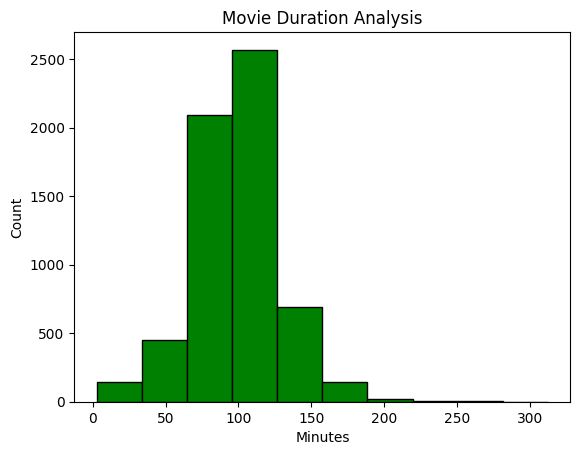

In [49]:
# Movie Duration Analysis

movie_duration = df[df['type']=='Movie'].copy()
movie_duration['duration'] = movie_duration['duration'].str.replace('min','').astype('float')

plt.hist(movie_duration['duration'],color='green',edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Movie Duration Analysis')
plt.show()

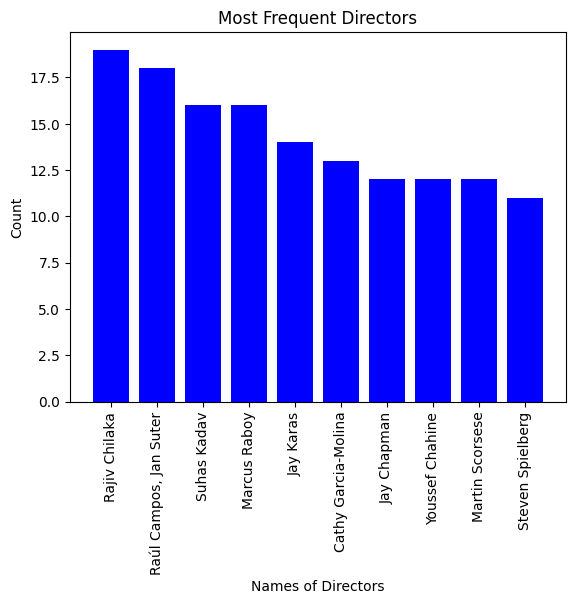

In [50]:
# Most Frequent Directors
directors = df.loc[df['director'] != "Unknown", 'director'].value_counts().head(10)

plt.bar(directors.index, directors.values, color='blue')
plt.xlabel('Names of Directors')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Most Frequent Directors')
plt.show()

In [51]:
# Content Ratings Distribution
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

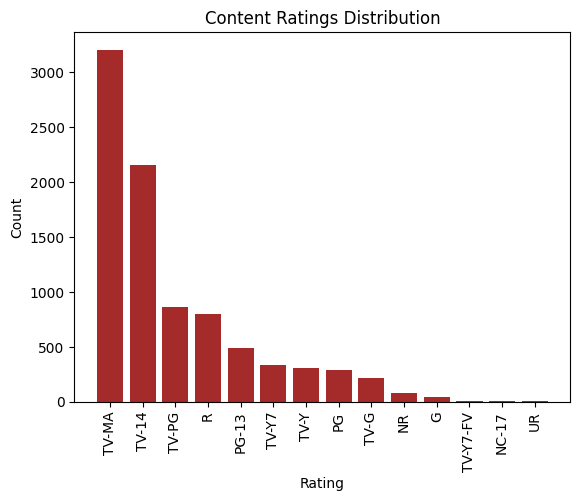

In [52]:
rating = df['rating'].value_counts()

plt.bar(rating.index, rating.values, color='brown')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Content Ratings Distribution')
plt.show()